<h1><center> ST7-OSTP : TP1 </center></h1>
<h2><center> 03/02/2022 </center></h2>

## Modules

In [36]:
# Modules de base
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# Module relatif à Gurobi
from gurobipy import *

## 1. Un premier Programme Linéaire

\begin{equation*}
    \begin{array}{ll}
        max & x_1 + x_2\\[2mm]
        s.t. & 
        \begin{array}{ll}
            2x_1 + x_2 & \le 14\\
            -x_1 + 2x_2 & \le 8\\
            2x_1 - x_2 & \le 10
        \end{array} \\[2mm]
        & x_1, x_2 \in \mathbb{R}+
    \end{array}
\end{equation*}

Nous dessinons le polyèdre correspondant aux solutions réalisables du programme linéaire ci-dessus et nous pouvons identifier graphiquement la solution optimale. 

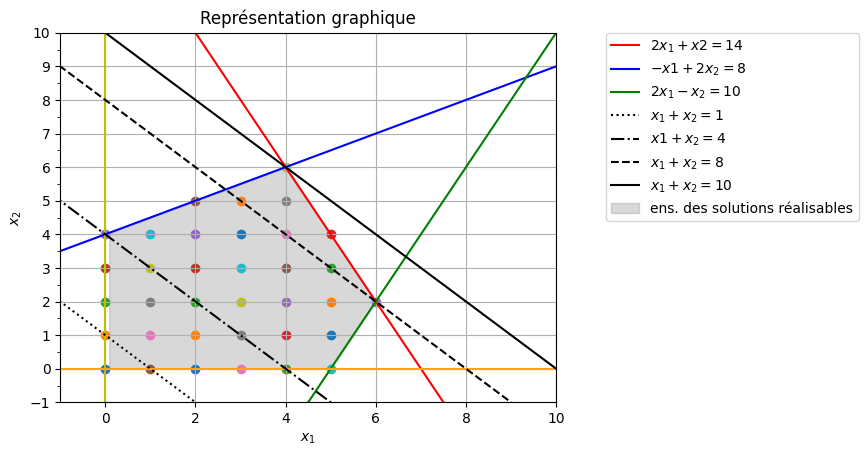

In [11]:
# -- Construction des droites associées aux contraintes --
x1s = np.linspace(-2, 50, 300)
x2s = np.linspace(-2, 50, 300)
# (C1)
x2s_C1 = 14 -2*x1s
# (C2)
x2s_C2 = 4 + 0.5*x1s
# (C3)
x2s_C3 =  -10 + 2*x1s
# Borne sur v0
x1s_bound = 0*x1s
# Borne sur v1
x2s_bound = 0*x2s


# -- Construction des droites associées à différentes valeurs de la fonction objectif --
obj1 = 1 - x1s
obj4 = 4 - x1s
obj8 = 8 - x1s
obj10 = 10 - x1s


# -- Dessin des droites associées aux contraintes --
plt.plot(x1s, x2s_C1, 'r', label = '$2x_1 + x2 = 14$')
plt.plot(x1s, x2s_C2, 'b', label = '$-x1 + 2x_2 = 8$')
plt.plot(x1s, x2s_C3, 'g', label = '$2x_1 - x_2 = 10$')
# plt.plot(x1s_bound, x1s, 'y', label = "$x_1 = 0$")
# plt.plot(x2s, x2s_bound, 'orange', label = "$x2 = 0$")
plt.plot(x1s_bound, x1s, 'y', label = "")
plt.plot(x2s, x2s_bound, 'orange', label = "")


# -- Dessin des droites associées à différentes valeurs de la fonction objectif --
plt.plot(x1s, obj1, 'k:', label = '$x_1 + x_2 = 1$')
plt.plot(x1s, obj4, 'k-.', label = '$x1 + x_2 = 4 $')
plt.plot(x1s, obj8, 'k--', label = '$x_1 + x_2 = 8$')
plt.plot(x1s, obj10, 'k', label = '$x_1 + x_2 = 10$')


# -- Dessin de la région des solutions réalisables --
limitsup = np.minimum(x2s_C1, x2s_C2)
limitinf2_3 = np.minimum(x2s_C3, x2s_C2)
limitinf = np.maximum(limitinf2_3, x2s_bound)
plt.fill_between(x1s, limitinf, limitsup, where = (x1s >= 0) & (x2s_C1 >= x2s_C3),
                 color = 'grey', alpha = 0.3, label = "ens. des solutions réalisables")
for x in range(0, 7):
    for y in range(0, 7):
        if 2*x + y <= 14 and -x + 2*y <= 8 and 2*x - y <= 10:
            plt.scatter(x, y)
            

# -- Définition des paramètres du graphique --
plt.grid()
plt.xlim((-1, 10)) 
plt.ylim((-1, 10))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(bbox_to_anchor = (1.1, 1), loc = 2, borderaxespad = 0.)
plt.title('Représentation graphique')
# ax = plt.axes()
# ax.yaxis.set_major_locator(MultipleLocator(1))
# ax.yaxis.set_minor_locator(MultipleLocator(1))
plt.gca().yaxis.set_major_locator(MultipleLocator(1))
plt.gca().yaxis.set_minor_locator(MultipleLocator(0.5))


# -- Affichage du graphique --
plt.show()

À l'aide du solveur Gurobi, vérifier le résultat graphique trouvé précédemment.

## 2.  Fabrication de télévisions

In [24]:
# -- Initialisation du modèle --
m = Model("PL2")


# -- Ajout des variables continues  --
xA = m.addVar(vtype=GRB.INTEGER,name = "xA", lb = 100)
xB = m.addVar(vtype=GRB.INTEGER,name = "xB", lb = 150)
xC = m.addVar(vtype=GRB.INTEGER,name = "xC", lb = 75)


# -- Ajout des constraintes --
m.addConstr(3*xA + 3.5*xB + 5*xC <= 12*150, name = "C1")
m.addConstr(4*xA + 5*xB + 8*xC <= 12*200, name = "C2")
m.addConstr(xA + 1.5*xB + 3*xC <= 12*60, name = "C3")



# -- Ajout de la fonction objectif
m.setObjective(160*xA +300*xB + 500*xC, GRB.MAXIMIZE)


# -- Choix d'un paramétrage d'affichage minimaliste --
m.params.outputflag = 1 # mode muet


# -- Mise à jour du modèle --
m.update()
m.printStats()

# -- Affichage en mode texte du PL --
# print(m.display())
# Fonction .display() dépréciée donc on utilise le code suivant

# Affichage personnalisé du modèle
def display_model(model):
    # Affichage des variables
    print("Variables:")
    for v in model.getVars():
        print(f"{v.VarName}, ", end="")
    print("\n")

    # Affichage des contraintes
    print("Contraintes:")
    for c in model.getConstrs():
        print(f"{c.ConstrName}, ", end="")
    print("\n")

    # Affichage de la fonction objectif
    print("Fonction objectif:")
    print(model.getObjective())

# Utilisation de la fonction d'affichage personnalisée
display_model(m)

# -- Résolution --
m.optimize()


# -- Affichage des solutions --
print("Les solutions optimales sont")
print("x1 =", xA.x)
print("x2 =", xB.x)
print("x3 =", xC.x)
print("avec pour valeur de l'objectif z =", m.objVal)



Statistics for model PL2:
  Linear constraint matrix    : 3 Constrs, 3 Vars, 9 NZs
  Variable types              : 0 Continuous,
3 Integer
  Matrix coefficient range    : [ 1, 8 ]
  Objective coefficient range : [ 160, 500 ]
  Variable bound range        : [ 75, 150 ]
  RHS coefficient range       : [ 720, 2400 ]
Variables:
xA, xB, xC, 

Contraintes:
C1, C2, C3, 

Fonction objectif:
160.0 xA + 300.0 xB + 500.0 xC
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1255U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 3 rows, 3 columns and 9 nonzeros
Model fingerprint: 0xf1b904a3
Variable types: 0 continuous, 3 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+00]
  Objective range  [2e+02, 5e+02]
  Bounds range     [8e+01, 2e+02]
  RHS range        [7e+02, 2e+03]
Found heuristic solution: objective 124420.

À l'aide du solveur Gurobi, modéliser et résoudre le PL correspondant au problème énoncé.

# 3. Confitures

In [25]:
# -- Initialisation du modèle --
m = Model("PL2")


# -- Ajout des variables continues  --
xA = m.addVar(vtype=GRB.INTEGER,name = "xA", ub = 200)
xB = m.addVar(vtype=GRB.INTEGER,name = "xB", ub = 200)
xC = m.addVar(vtype=GRB.INTEGER,name = "xC")


# -- Ajout des constraintes --
m.addConstr(xA + xB + xC >= 1000, name = "C1")
m.addConstr(xA + xB + xC <= 1000, name = "C2")
m.addConstr(0.75*xA -0.25*xB >= 0, name = "C3")
m.addConstr(0.75*xB-0.25*xA >= 0, name = "C4")
m.addConstr(0.65*xA+0.65*xB - 0.35*xC >= 0, name = "C5")



# -- Ajout de la fonction objectif
m.setObjective(7*xA +14*xB + xC, GRB.MINIMIZE)


# -- Choix d'un paramétrage d'affichage minimaliste --
m.params.outputflag = 1 # mode muet


# -- Mise à jour du modèle --
m.update()
m.printStats()

# -- Affichage en mode texte du PL --
# print(m.display())
# Fonction .display() dépréciée donc on utilise le code suivant

# Affichage personnalisé du modèle
def display_model(model):
    # Affichage des variables
    print("Variables:")
    for v in model.getVars():
        print(f"{v.VarName}, ", end="")
    print("\n")

    # Affichage des contraintes
    print("Contraintes:")
    for c in model.getConstrs():
        print(f"{c.ConstrName}, ", end="")
    print("\n")

    # Affichage de la fonction objectif
    print("Fonction objectif:")
    print(model.getObjective())

# Utilisation de la fonction d'affichage personnalisée
display_model(m)




Statistics for model PL2:
  Linear constraint matrix    : 5 Constrs, 3 Vars, 13 NZs
  Variable types              : 0 Continuous,
3 Integer
  Matrix coefficient range    : [ 0.25, 1 ]
  Objective coefficient range : [ 1, 14 ]
  Variable bound range        : [ 200, 200 ]
  RHS coefficient range       : [ 1000, 1000 ]
Variables:
xA, xB, xC, 

Contraintes:
C1, C2, C3, C4, C5, 

Fonction objectif:
7.0 xA + 14.0 xB + xC


In [26]:
# -- Résolution --
m.optimize()


# -- Affichage des solutions --
print("Les solutions optimales sont")
print("x1 =", xA.x)
print("x2 =", xB.x)
print("x3 =", xC.x)
print("avec pour valeur de l'objectif z =", m.objVal)

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1255U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 5 rows, 3 columns and 13 nonzeros
Model fingerprint: 0x2b264749
Variable types: 0 continuous, 3 integer (0 binary)
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [1e+00, 1e+01]
  Bounds range     [2e+02, 2e+02]
  RHS range        [1e+03, 1e+03]
Presolve removed 5 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 1: 4150 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.150000000000e+03, best bound 4.150000000000e+03, gap 0.0000%
Les solutions optimales sont
x1 = 200.0
x2 = 150.0
x3 = 650.0
avec pour valeur de l'objecti

# 4. Aide Humanitaire 

### Question  1

Nous dessinons le polyèdre correspondant aux plans d'actions réalisables décrit par :

$$
\begin{array}{ll}
    &
    %\left\{
    \begin{array}{rcrl}
         & & 5p_2 & \leq 25 \\
        p_1 & + & 3p_2 & \leq 18 \\
        6p_1 & + & 2p_2 & \leq 60  
    \end{array}  
    %\right. 
    \\[2mm]
    & p_1, ~ p_2 \in \mathbb{N}
\end{array}
$$

In [29]:
# Note :
# Dans la suite de l'exercice, nous étudions des variantes d'un problème d'optimisation.
# Afin de factoriser le code correspondant à la génération de la représentation graphique, nous créons deux fonctions: 
# la première construisant la partie récurrente de la représentation graphique, la seconde gérant l'affichage.
# De sorte que pour ajouter ce qui est propre à une variante, il suffit d'appliquer la première fonction,
# ajouter le contenu propre à la variante (nouvelle fonction objectif, etc.) puis appliquer la seconde fonction.


def build_plot_basis():
    
    # -- Construction des droites associées aux contraintes --
    p1s = np.linspace(-2, 50, 300)
    p2s = np.linspace(-2, 50, 300)
    # (C1)
    p2s_C1 = 5 +0*p1s
    # (C2)
    p2s_C2 = 6 - (1/3)*p1s
    # (C3)
    p2s_C3 = 30 -3*p1s
    # Borne sur v0
    p1s_bound = 0*p1s
    # Borne sur v1
    p2s_bound = 0*p2s
    
    # -- Dessin des droites associées aux contraintes --
    plt.plot(p1s, p2s_C1, 'r', label = '$ p_2 = 5$')
    plt.plot(p1s, p2s_C2, 'b', label = '$p_1 + 3p_2 = 18$')
    plt.plot(p1s, p2s_C3, 'g', label = '$6p_1 + 2p_2 = 60$')
    # plt.plot(p1s_bound, p1s, 'y', label = "$p_1 = 0$")
    # plt.plot(p2s, p2s_bound, 'orange', label = "$p2 = 0$")
    plt.plot(p1s_bound, p1s, 'y', label = "")
    plt.plot(p2s, p2s_bound, 'orange', label = "")

    # -- Dessin de la région des solutions réalisables --
    limitsup_1_2 = np.minimum(p2s_C1, p2s_C2)
    limitsup_1_2_3 = np.minimum(p2s_C3, limitsup_1_2)
    plt.fill_between(p1s, p1s_bound, limitsup_1_2_3, where =(p1s >= 0) & (p2s_C3 >= 0),
                     color = 'grey', alpha = 0.3, label = "ens. des plans d'action réalisables")
    for x in range(0, 11):
        for y in range(0, 6):
            if 2*y <= 25 and x + 3*y <= 18 and 6*x +2*y <= 60:
                plt.scatter(x, y, c='#7f7f7f')
                
    return p1s, p2s


def show_plot():
    
    # -- Définition des paramètres du graphique --
    plt.grid()
    plt.xlim((-1, 12)) 
    plt.ylim((-1, 8))
    plt.xlabel('$p_1$')
    plt.ylabel('$p_2$')
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
    plt.title('Représentation graphique')
    # ax = plt.axes()
    # ax.yaxis.set_major_locator(MultipleLocator(1))
    # ax.yaxis.set_minor_locator(MultipleLocator(1))
    # ax.xaxis.set_major_locator(MultipleLocator(1))
    # ax.xaxis.set_minor_locator(MultipleLocator(1))
    
    # -- Affichage --
    plt.show()

### Question 2

L'ajout de la fonction objectif à l'ensemble des contraintes proposées précédemment donne le programme linéaire suivant :

$$
\begin{array}{cl}
    %\underset{p_1, ~ p_2}{max} 
    max
    & 2000p_1 + 3000p_2 \\[2mm]
    s.t. &
    \begin{array}{rcrl}
         & & 5p_2 & \leq 25 \\
        p_1 & + & 3p_2 & \leq 18 \\
        6p_1 & + & 2p_2 & \leq 60  
    \end{array}
    \\[2mm]
    & p_1, ~ p_2 \in \mathbb{N}
\end{array}
$$

Complétons la représentation graphique précédente avec la fonction objectif.

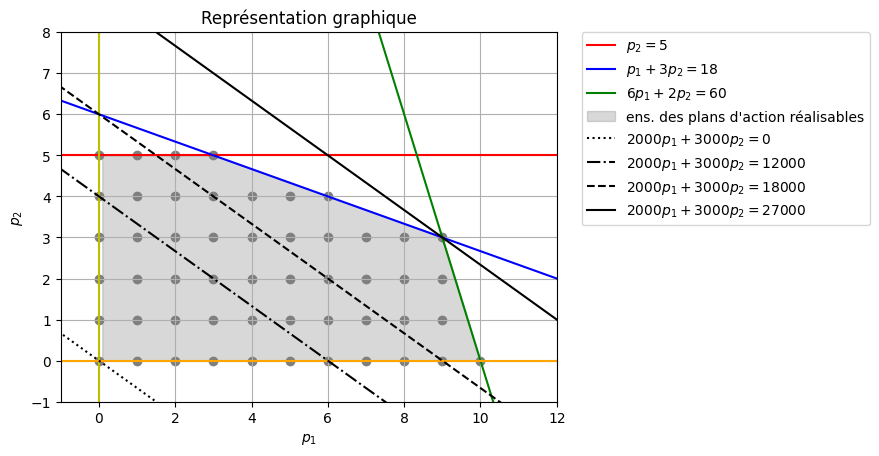

In [30]:
# -- Affichage du graphique --
p1s, p2s = build_plot_basis()


# -- Construction des droites associées à différentes valeurs de la fonction objectif --
obj0 = -(2/3)*p1s
obj12 = 4 -(2/3)*p1s
obj18 = 6 -(2/3)*p1s
obj27 = 9 -(2/3)*p1s


# -- Dessin des droites associées à différentes valeurs de la fonction objectif --
plt.plot(p1s, obj0, 'k:', label = '$2000p_1 + 3000p_2 = 0$')
plt.plot(p1s, obj12, 'k-.', label = '$2000p_1 + 3000p_2 = 12000$')
plt.plot(p1s, obj18, 'k--', label = '$2000p_1 + 3000p_2 = 18000$')
plt.plot(p1s, obj27, 'k', label = '$2000p_1 + 3000p_2 = 27000$')


show_plot()

Nous pouvons identifier la solution optimale du problème sur le graphique représenté précédemment. <br>
Vérifier ce résultat à l'aide du solveur Gurobi.

In [ ]:
# -- Initialisation du modèle --
# A compléter


# -- Ajout des variables --
# A compléter


# -- Ajout des contraintes --
# A compléter


# -- Ajout de la fonction objectif --
# A compléter


# -- Choix d'un paramétrage --
# A compléter


# -- Mise à jour du modèle  --
# A compléter


# -- Affichage en mode texte du PL --
# A compléter

In [ ]:
# -- Résolution --
# A compléter


# -- Affichage de la solution --
# "La solution optimale est ... avec pour valeur de l'objectif ..."
# "dont ... pour le pays 1 et ... pour le pays 2"
# A compléter

### Question 3 

#### Pays 1

Nous donnons ci-dessous la représentation graphique du programme linéaire pour le pays 1.

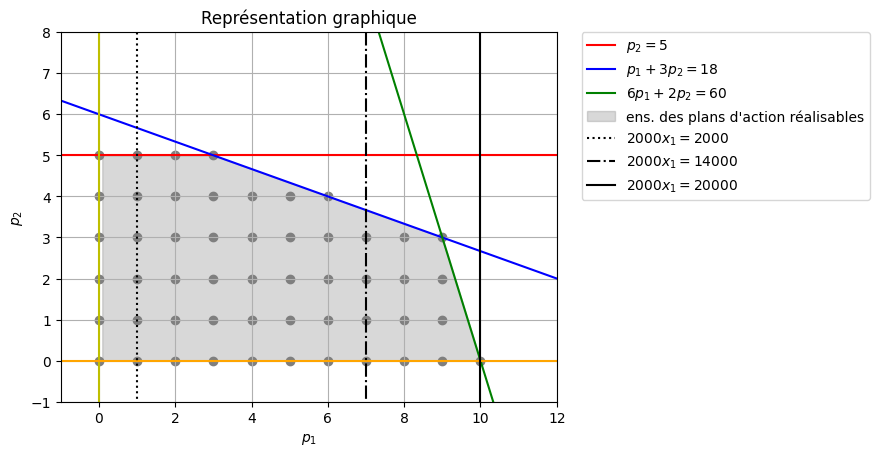

In [31]:
# -- Affichage du graphique --
p1s, p2s = build_plot_basis()


# -- Construction des droites associées à différentes valeurs de la fonction objectif --
plt.plot(1 + 0*p1s, p2s, 'k:', label = "$2000x_1 = 2000$")
plt.plot(7 + 0*p1s, p2s, 'k-.', label = "$2000x_1 = 14000$")
plt.plot(10 + 0*p1s, p2s, 'k', label = "$2000x_1 = 20000$")


show_plot()

Nous pouvons identifier la solution optimale du problème sur le graphique représenté précédemment. <br>
Vérifier ce résultat à l'aide du solveur Gurobi.

In [ ]:
# -- Initialisation du modèle --
# A compléter


# -- Ajout des variables  --
# A compléter


# -- Ajout des contraintes --
# A compléter


# -- Ajout de la fonction objectif --
# A compléter


# -- Choix d'un paramétrage --
# A compléter


# -- Mise à jour du modèle  --
# A compléter


# -- Affichage en mode texte du PL --
# A compléter

In [ ]:
# -- Résolution --
# A compléter


# -- Affichage de la solution --
# "La solution optimale est ..."
# A compléter

#### Pays 2

Nous donnons ci-dessous la représentation graphique du programme linéaire pour le pays 2.

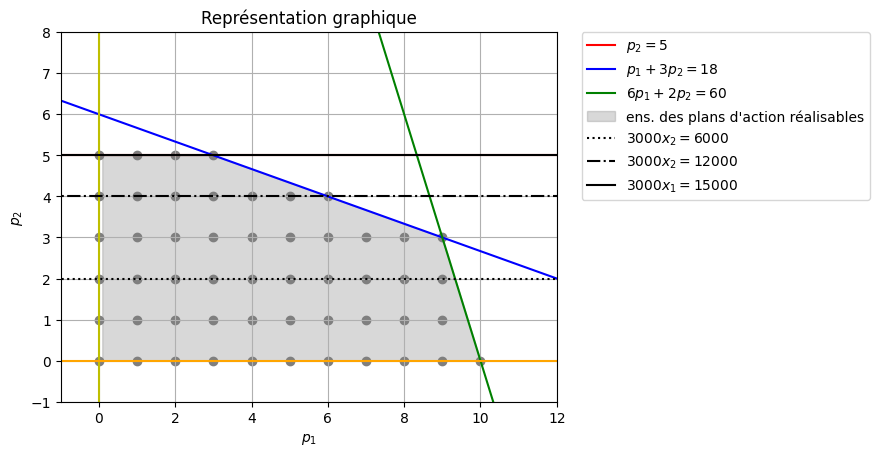

In [32]:
# -- Affichage du graphique --
p1s, p2s = build_plot_basis()


# -- Construction des droites associées à différentes valeurs de la fonction objectif --
plt.plot(p1s, 2 + 0*p1s, 'k:', label = "$3000x_2 = 6000$")
plt.plot(p1s, 4 + 0*p1s, 'k-.', label = "$3000x_2 = 12000$")
plt.plot(p1s, 5 + 0*p1s, 'k', label = "$3000x_1 = 15000$")


show_plot()

Nous pouvons identifier la solution optimale du problème sur le graphique représenté précédemment. <br>
Vérifier ce résultat à l'aide du solveur Gurobi.

In [ ]:
# -- Initialisation du modèle --
# A compléter


# -- Ajout des variables  --
# A compléter


# -- Ajout des contraintes --
# A compléter


# -- Ajout de la fonction objectif --
# A compléter


# -- Choix d'un paramétrage --
# A compléter


# -- Mise à jour du modèle  --
# A compléter


# -- Affichage en mode texte du PL --
# A compléter

In [ ]:
# -- Résolution --
# A compléter


# -- Affichage de la solution --
# "La solution optimale est ..."
# A compléter

### Question 4

Nous donnons ci-dessous la représentation graphique du programme linéaire associé à cette question.

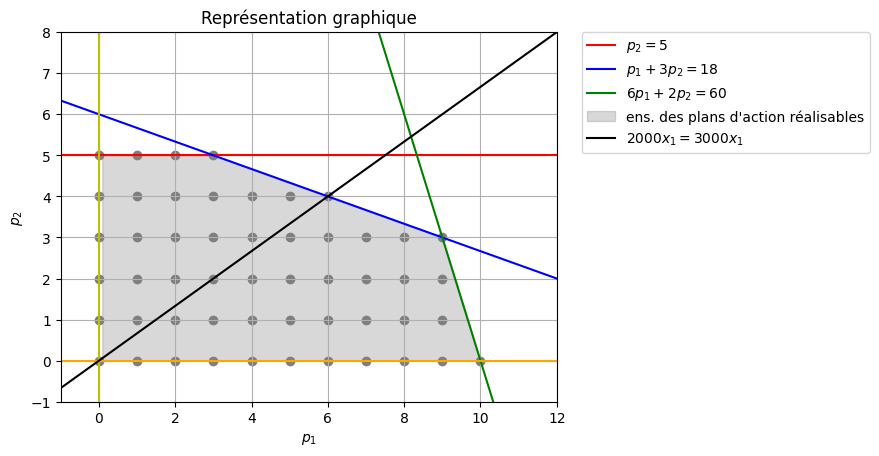

In [33]:
# -- Affichage du graphique --
p1s, p2s = build_plot_basis()


# -- Construction de droite associée à la contrainte d'égalité --
p2s_Ceq = (2/3)*p1s
plt.plot(p1s, p2s_Ceq, 'k', label = "$2000x_1 = 3000x_1$")


show_plot()

Nous pouvons identifier la solution optimale du problème sur le graphique représenté précédemment. <br>
Vérifier ce résultat à l'aide du solveur Gurobi.

In [ ]:
# -- Initialisation du modèle --
# A compléter


# -- Ajout des variables  --
# A compléter


# -- Ajout des contraintes --
# A compléter


# -- Ajout de la fonction objectif --
# A compléter


# -- Choix d'un paramétrage --
# A compléter


# -- Mise à jour du modèle  --
# A compléter


# -- Affichage en mode texte du PL --
# A compléter

In [ ]:
# -- Résolution --
# A compléter


# -- Affichage de la solution --
# "La solution optimale est ... avec pour valeur de l'objectif ..."
# "dont ... pour le pays 1 et ... pour le pays 2"
# A compléter

### Question 5

Calculer le bilan des ressources consommées

In [ ]:
# "Ressources consommées :
# "..."
# A compléter

### Question 6

Implémenter le nouveau programme linéaire correspondant à cette question et le résoudre avec Gurobi.

In [43]:
# -- Initialisation du modèle --
m = Model("PL2")


# -- Ajout des variables continues  --
x1 = m.addVar(vtype=GRB.CONTINUOUS,name = "x1", lb = 6)
x2 = m.addVar(vtype=GRB.CONTINUOUS,name = "x2", lb = 4)
m1 = m.addVar(vtype=GRB.CONTINUOUS,name = "m")

# -- Ajout des constraintes --
m.addConstr(5*x2 <= 25, name = "C1")
m.addConstr(x1 + 3*x2 <= 18 + m1, name = "C2")
m.addConstr(60*x1 + 20*x2 <= 600 - 20*m1, name = "C3")




# -- Ajout de la fonction objectif
m.setObjective(2000*x1 + 3000*x2, GRB.MAXIMIZE)


# -- Choix d'un paramétrage d'affichage minimaliste --
m.params.outputflag = 1 # mode muet


# -- Mise à jour du modèle --
m.update()
m.printStats()

# -- Affichage en mode texte du PL --
# print(m.display())
# Fonction .display() dépréciée donc on utilise le code suivant

# Affichage personnalisé du modèle
def display_model(model):
    # Affichage des variables
    print("Variables:")
    for v in model.getVars():
        print(f"{v.VarName}, ", end="")
    print("\n")

    # Affichage des contraintes
    print("Contraintes:")
    for c in model.getConstrs():
        print(f"{c.ConstrName}, ", end="")
    print("\n")

    # Affichage de la fonction objectif
    print("Fonction objectif:")
    print(model.getObjective())

# Utilisation de la fonction d'affichage personnalisée
display_model(m)


Statistics for model PL2:
  Linear constraint matrix    : 3 Constrs, 3 Vars, 7 NZs
  Matrix coefficient range    : [ 1, 60 ]
  Objective coefficient range : [ 2000, 3000 ]
  Variable bound range        : [ 4, 6 ]
  RHS coefficient range       : [ 18, 600 ]
Variables:
x1, x2, m, 

Contraintes:
C1, C2, C3, 

Fonction objectif:
2000.0 x1 + 3000.0 x2


In [44]:
# -- Résolution --
m.optimize()


# -- Affichage des solutions --
print("Les solutions optimales sont")
print("x1 =", x1.x)
print("x2 =", x2.x)
print("m =", m1.x)
print("avec pour valeur de l'objectif z =", m.objVal)

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1255U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 3 rows, 3 columns and 7 nonzeros
Model fingerprint: 0xdabdea1e
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [2e+03, 3e+03]
  Bounds range     [4e+00, 6e+00]
  RHS range        [2e+01, 6e+02]
Presolve removed 3 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.9000000e+04   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  2.900000000e+04
Les solutions optimales sont
x1 = 7.0
x2 = 5.0
m = 4.0
avec pour valeur de l'objectif z = 29000.0


Calculer à nouveau le bilan des ressources consommées

In [ ]:
# "Ressources consommées :
# "..."
# A compléter

### Question 7

Généraliser l'implémentation de la question 6 pour différentes valeur de coût de médecin supplémentaire.

In [ ]:
# Cout_med : coût d'embauche d'un médecin supplémentaire
# cout_med = ...


# -- Initialisation du modèle --
# A compléter


# -- Ajout des variables  --
# A compléter


# -- Ajout des contraintes --
# A compléter


# -- Ajout de la fonction objectif --
# A compléter


# -- Choix d'un paramétrage --
# A compléter


# -- Mise à jour du modèle  --
# A compléter


# -- Affichage en mode texte du PL --
# A compléter

In [ ]:
# -- Résolution --
# A compléter


# -- Affichage de la solution --
# "La solution optimale est ... avec pour valeur de l'objectif ..."
# "dont ... pour le pays 1 et ... pour le pays 2"
# A compléter

# 5. Media Planning

### Question 1

Implémenter un $\texttt{Model}$ (de la bibliothèque $\texttt{gurobipy}$) avec les dix variables de décision du problème.

In [64]:
# -- Initialisation du modèle --
m = Model("PL2")


# -- Ajout des variables continues  --
A = m.addVar(vtype=GRB.CONTINUOUS,name = "A", lb = 200, ub = 1000)
Q1 = m.addVar(vtype=GRB.CONTINUOUS,name = "Q1")
Q2 = m.addVar(vtype=GRB.CONTINUOUS,name = "Q2")
Q3 = m.addVar(vtype=GRB.CONTINUOUS,name = "Q3")
H1 = m.addVar(vtype=GRB.CONTINUOUS,name = "H1")
H2 = m.addVar(vtype=GRB.CONTINUOUS,name = "H2")
P1 = m.addVar(vtype=GRB.CONTINUOUS,name = "P1")
P2 = m.addVar(vtype=GRB.CONTINUOUS,name = "P2")
TV = m.addVar(vtype=GRB.CONTINUOUS,name = "TV", lb = 600, ub = 3000)
C = m.addVar(vtype=GRB.CONTINUOUS,name = "C", lb = 300, ub = 600)


# -- Ajout des constraintes --
m.addConstr(A+Q1+Q2+Q3+H1+H2+P1+P2+TV+C<=1500, name = "C1")
m.addConstr(Q1+Q2+Q3+H1+H2<=1500, name = "C2")
m.addConstr(Q1+Q2+Q3+H1+H2>=300, name = "C3")
m.addConstr(P1+P2<=2000, name = "C4")
m.addConstr(P1+P2>=50, name = "C5")
m.addConstr(Q1>=Q2, name = "C6")
m.addConstr(Q2>=Q3, name = "C7")
m.addConstr(H1>=H2, name = "C8")
m.addConstr(Q3>=0.5*Q1, name = "C9")
m.addConstr(TV>=2*(Q1+Q2+Q3+H1+H2), name = "C10")
m.addConstr(P1>=1.5*P2, name = "C11")
m.addConstr(P1<=1.5*P2, name = "C12")



# -- Ajout de la fonction objectif
m.setObjective(2/1000*A + 3/1000*(Q1+Q2+Q3) + 4/1000*(P1+P2) + 5/1000*TV + 1/1000*C, GRB.MAXIMIZE)


# -- Choix d'un paramétrage d'affichage minimaliste --
m.params.outputflag = 1 # mode muet


# -- Mise à jour du modèle --
m.update()
m.printStats()

# -- Affichage en mode texte du PL --
# print(m.display())
# Fonction .display() dépréciée donc on utilise le code suivant

# Affichage personnalisé du modèle
def display_model(model):
    # Affichage des variables
    print("Variables:")
    for v in model.getVars():
        print(f"{v.VarName}, ", end="")
    print("\n")

    # Affichage des contraintes
    print("Contraintes:")
    for c in model.getConstrs():
        print(f"{c.ConstrName}, ", end="")
    print("\n")

    # Affichage de la fonction objectif
    print("Fonction objectif:")
    print(model.getObjective())

# Utilisation de la fonction d'affichage personnalisée
display_model(m)


Statistics for model PL2:
  Linear constraint matrix    : 12 Constrs, 10 Vars, 42 NZs
  Matrix coefficient range    : [ 0.5, 2 ]
  Objective coefficient range : [ 0.001, 0.005 ]
  Variable bound range        : [ 200, 3000 ]
  RHS coefficient range       : [ 50, 2000 ]
Variables:
A, Q1, Q2, Q3, H1, H2, P1, P2, TV, C, 

Contraintes:
C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12, 

Fonction objectif:
0.002 A + 0.003 Q1 + 0.003 Q2 + 0.003 Q3 + 0.004 P1 + 0.004 P2 + 0.005 TV + 0.001 C


### Question 2

Implémenter la fonction objectif.

In [65]:
# -- Résolution --
m.optimize()


# -- Affichage des solutions --
print("Les solutions optimales sont")
print("A =", A.x)
print("Q1 =", Q1.x)
print("Q2 =", Q2.x)
print("Q3 =", Q3.x)
print("H1 =", H1.x)
print("H2 =", H2.x)
print("P1 =", P1.x)
print("P2 =", P2.x)
print("TV =", TV.x)
print("C =", C.x)

print("avec pour valeur de l'objectif z =", m.objVal)

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1255U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 12 rows, 10 columns and 42 nonzeros
Model fingerprint: 0x3eeba6c9
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [1e-03, 5e-03]
  Bounds range     [2e+02, 3e+03]
  RHS range        [5e+01, 2e+03]
Presolve removed 5 rows and 4 columns
Presolve time: 0.01s
Presolved: 7 rows, 7 columns, 26 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.6509510e+00   3.761888e+01   0.000000e+00      0s
       4    5.0500000e+00   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.02 seconds (0.00 work units)
Optimal objective  5.050000000e+00
Les solutions optimales sont
A = 200.0
Q1 = 150.0
Q2 = 75.0
Q3 = 75.0
H1 = 0.0
H2 = 0.0
P1 = 30.000000000000004
P2 = 20.0

### Question 3
#### Question 3.a)

Implémenter les trois types de contraintes correspondant à la spécification du problème.

**Contrainte de budget**

In [ ]:
# -- Ajout des contraintes --
# A compléter

**Contraintes de seuils min et max**

In [ ]:
# -- Ajout des contraintes --
# A compléter

#### Question 3.b) 

Implémenter les trois types de contraintes correspondant aux règles empiriques.

**Contrainte d'ordre des sous-budgets presse**

In [ ]:
# -- Ajout des contraintes --
# A compléter

**Contrainte de ratio des sous-bugets quotidiens**

In [ ]:
# -- Ajout des contraintes --
# A compléter

**Contrainte de ratio des budgets TV presse**

In [ ]:
# -- Ajout des contraintes --
# A compléter

**Contrainte de ratio des sous-budgets internet**

In [ ]:
# -- Ajout des contraintes --
# A compléter

In [ ]:
# -- Choix d'un paramétrage --
# A compléter


# -- Mise à jour du modèle  --
# A compléter


# -- Affichage en mode texte du PL --
# A compléter

### Question 4 

Résoudre le programme linéaire

In [ ]:
# -- Résolution --
# A compléter


# -- Affichage de la solution --
# "Une solution optimale est : ... ... ... ... ... ... ... ... ..."
# "Pour une efficacité maximale de : ...%"